# Analisi Dataset

Come primo step fondamentale del nostro progetto, effettueremo un'analisi generale sull'intero training set che abbiamo a disposizione. Per semplicità il nostro training set è stato ridotto dell'80%, passando da una **dimensione iniziale di 1.90 GB con 64721 audio totali** a una **dimensione finale di 389 MB con 12933 audio totali**.


Nella successiva cella, andiamo ad importare le librerie che saranno utili proprio per l'analisi descritta nella cella di testo precedente.

In [1]:
#importo le librerie necessarie
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as IPD
import wave

## Importazione del dataset

Andiamo ad importare il training set, in questo modo lo avremo a disposizione per tutte le varie operazioni di analisi che andremo a svolgere nelle prossime celle.

In [ ]:
# con le successive 3 righe di codice andiamo ad scaricare il training set
!wget --no-check-certificate 'https://cdn.discordapp.com/attachments/1209871752134529066/1248571032449581116/reduced_dataset.zip?ex=666425e3&is=6662d463&hm=5d7859ac5d2e3fb59155f8e7d4e8bfb61e4d0ef173f878ddc42f53dd38c8d2cb&' -O ../reduced_dataset.zip
!unzip ../reduced_dataset.zip
!mv reduced_dataset ..

Il procedimento che andiamo ad eseguire sotto, è lo stesso che abbiamo introdotto all'interno del notebook con la quale abbiamo ridotto il training set.
Questo ci consentirà di visualizzare quanti file audio sono presenti e quante classi sono presenti all'interno del training set

In [2]:
train_ds = tf.keras.utils.audio_dataset_from_directory(directory='../reduced_dataset/train/audio')

print('\nNumero classi:', len(train_ds.class_names))
print('Classi:', train_ds.class_names)

Found 12933 files belonging to 30 classes.

Numero classi: 30
Classi: ['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy', 'house', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'wow', 'yes', 'zero']


L'analisi visuale e statistica del nostro training set, inizia da una delle fondamentali attività per conoscere a fondo i dati con cui andremo a lavorare, ovvero visualizzare quante e quali classi abbiamo, per questo motivo andiamo a mostrare da quanti file audio è composto il nostro training set e quanti file audio sono contenuti in ogni singola cartella. In questo modo, stiamo andando ad esplorare sempre più a fondo il dataset.

In [3]:
label_counter = dict() # creiamo dizionario per tenere traccia della quantità di file per ogni label

# contiamo il numero di file per ogni label
for audio, labels in train_ds:
    for label in labels:
        label_name = train_ds.class_names[label.numpy()] # label è un int, perciò devo ricavarmi il nome

        # essendo il dizionario vuoto, darebbe errore se provassi ad accedere a una key inesistente
        if label_name not in label_counter.keys():
            label_counter[label_name] = 1
        else:
            label_counter[label_name] += 1

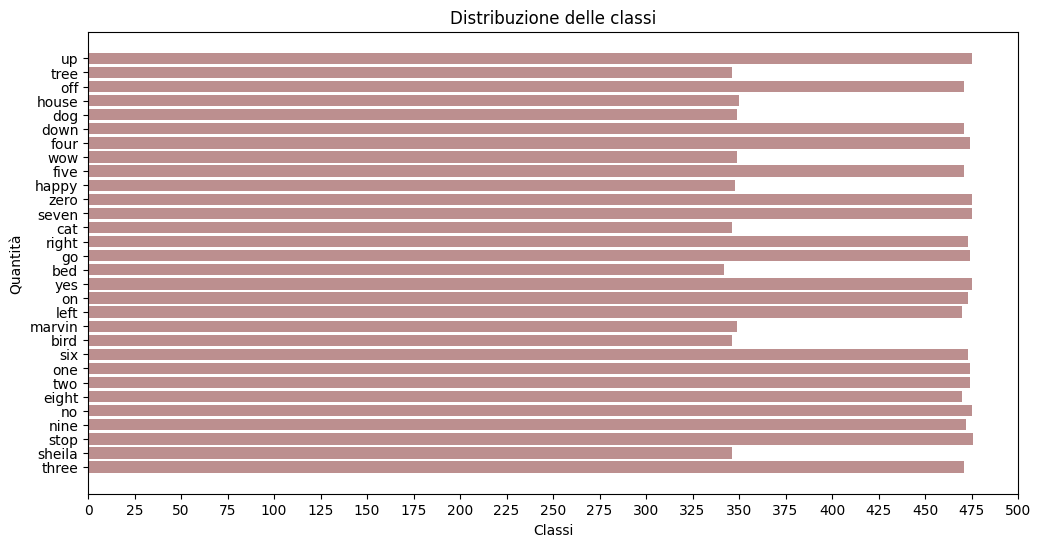

In [4]:
# mostriamo la distribuzione delle classi
plt.figure(figsize=(12, 6))
plt.barh(label_counter.keys(), label_counter.values(), color='rosybrown')
plt.xlabel('Classi')
plt.ylabel('Quantità')
plt.title('Distribuzione delle classi')
plt.xticks(np.arange(0, 525, 25))
plt.show()

## Riproduciamo un audio

`IPython.display` è una libreria utilizzata per mostrare diversi tipi di file: immagini, audio, video, file html, etc...

Ovviamente noi la utilizzeremo per riprodurre un audio scelto casualmente da noi.


In [5]:
#proviamo ad ascoltare un audio e capiamo come farlo sopratutto
path_audio = '../reduced_dataset/train/audio/wow/41dce6f5_nohash_0.wav'
audio = IPD.Audio(path_audio, autoplay=False)
display(audio)

Mostrando graficamente l'audio appena ascoltato possiamo notare l'ampiezza dell'audio, e di conseguenza i rispettivi minimi e massimi, che in questo caso corrispondono a **31857** e **-28770**.

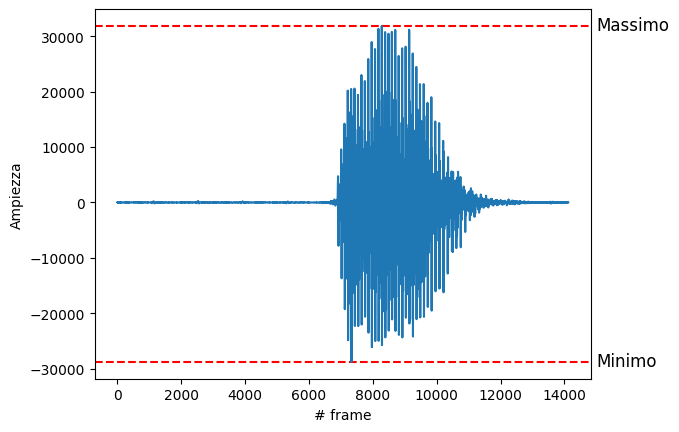

In [6]:
# leggiamo l'audio dalla path sopra indicata
audio = wave.open(path_audio, "r").readframes(-1)
audio = np.frombuffer(audio, dtype=np.int16)

# disegniamo le linee del massimo e del minimo, con i rispettivi flag
plt.axhline(y=max(audio), c='r', linestyle='--')
plt.axhline(y=min(audio), c='r', linestyle='--')
plt.text(15000, max(audio) - 750, 'Massimo', fontsize=12)
plt.text(15000, min(audio) - 750, 'Minimo', fontsize=12)

# infine mostriamo il plot
plt.ylabel('Ampiezza')
plt.xlabel('# frame')
plt.plot(audio)
plt.show()

## Funzioni utilizzate
Andiamo a creare due funzioni che ci serviranno per mostrare un audio per ogni classe.

La prima funzione è `take_audios()`, che si occcupa di ottenere un audio per ogni classe presente. La funzione ritorna un dizionario che contiene come **chiave** il nome della classe e come valore **l'audio corrispondente**.

In [7]:
def take_audios():
    audio_to_show = dict() # creo il dizionario che conterrà gli audio

    # itero i batch del training set
    for audios, labels in train_ds:
        # itero all'interno del batch 
        for index, label in enumerate(labels):
            # questo controllo serve per evitare cicli inutili
            # quindi si blocca quando ha preso un audio per ogni classe
            if len(audio_to_show) == 30:
                return audio_to_show

            # mi salvo il nome della classe
            label_name = train_ds.class_names[label.numpy()]

            # se la label non è presente nel dizionario allora aggiungo l'audio
            if label_name not in audio_to_show.keys():
                audio_to_show[label_name] = audios[index]

    return audio_to_show

In [8]:
# quindi ci ricaviamo gli audio da mostrare nel plot
audios = take_audios()

Adesso che abbiamo un audio per ogni classe possiamo mostrarli in un plot **3 x 10** utilizzando la libreria `matplotlib`.

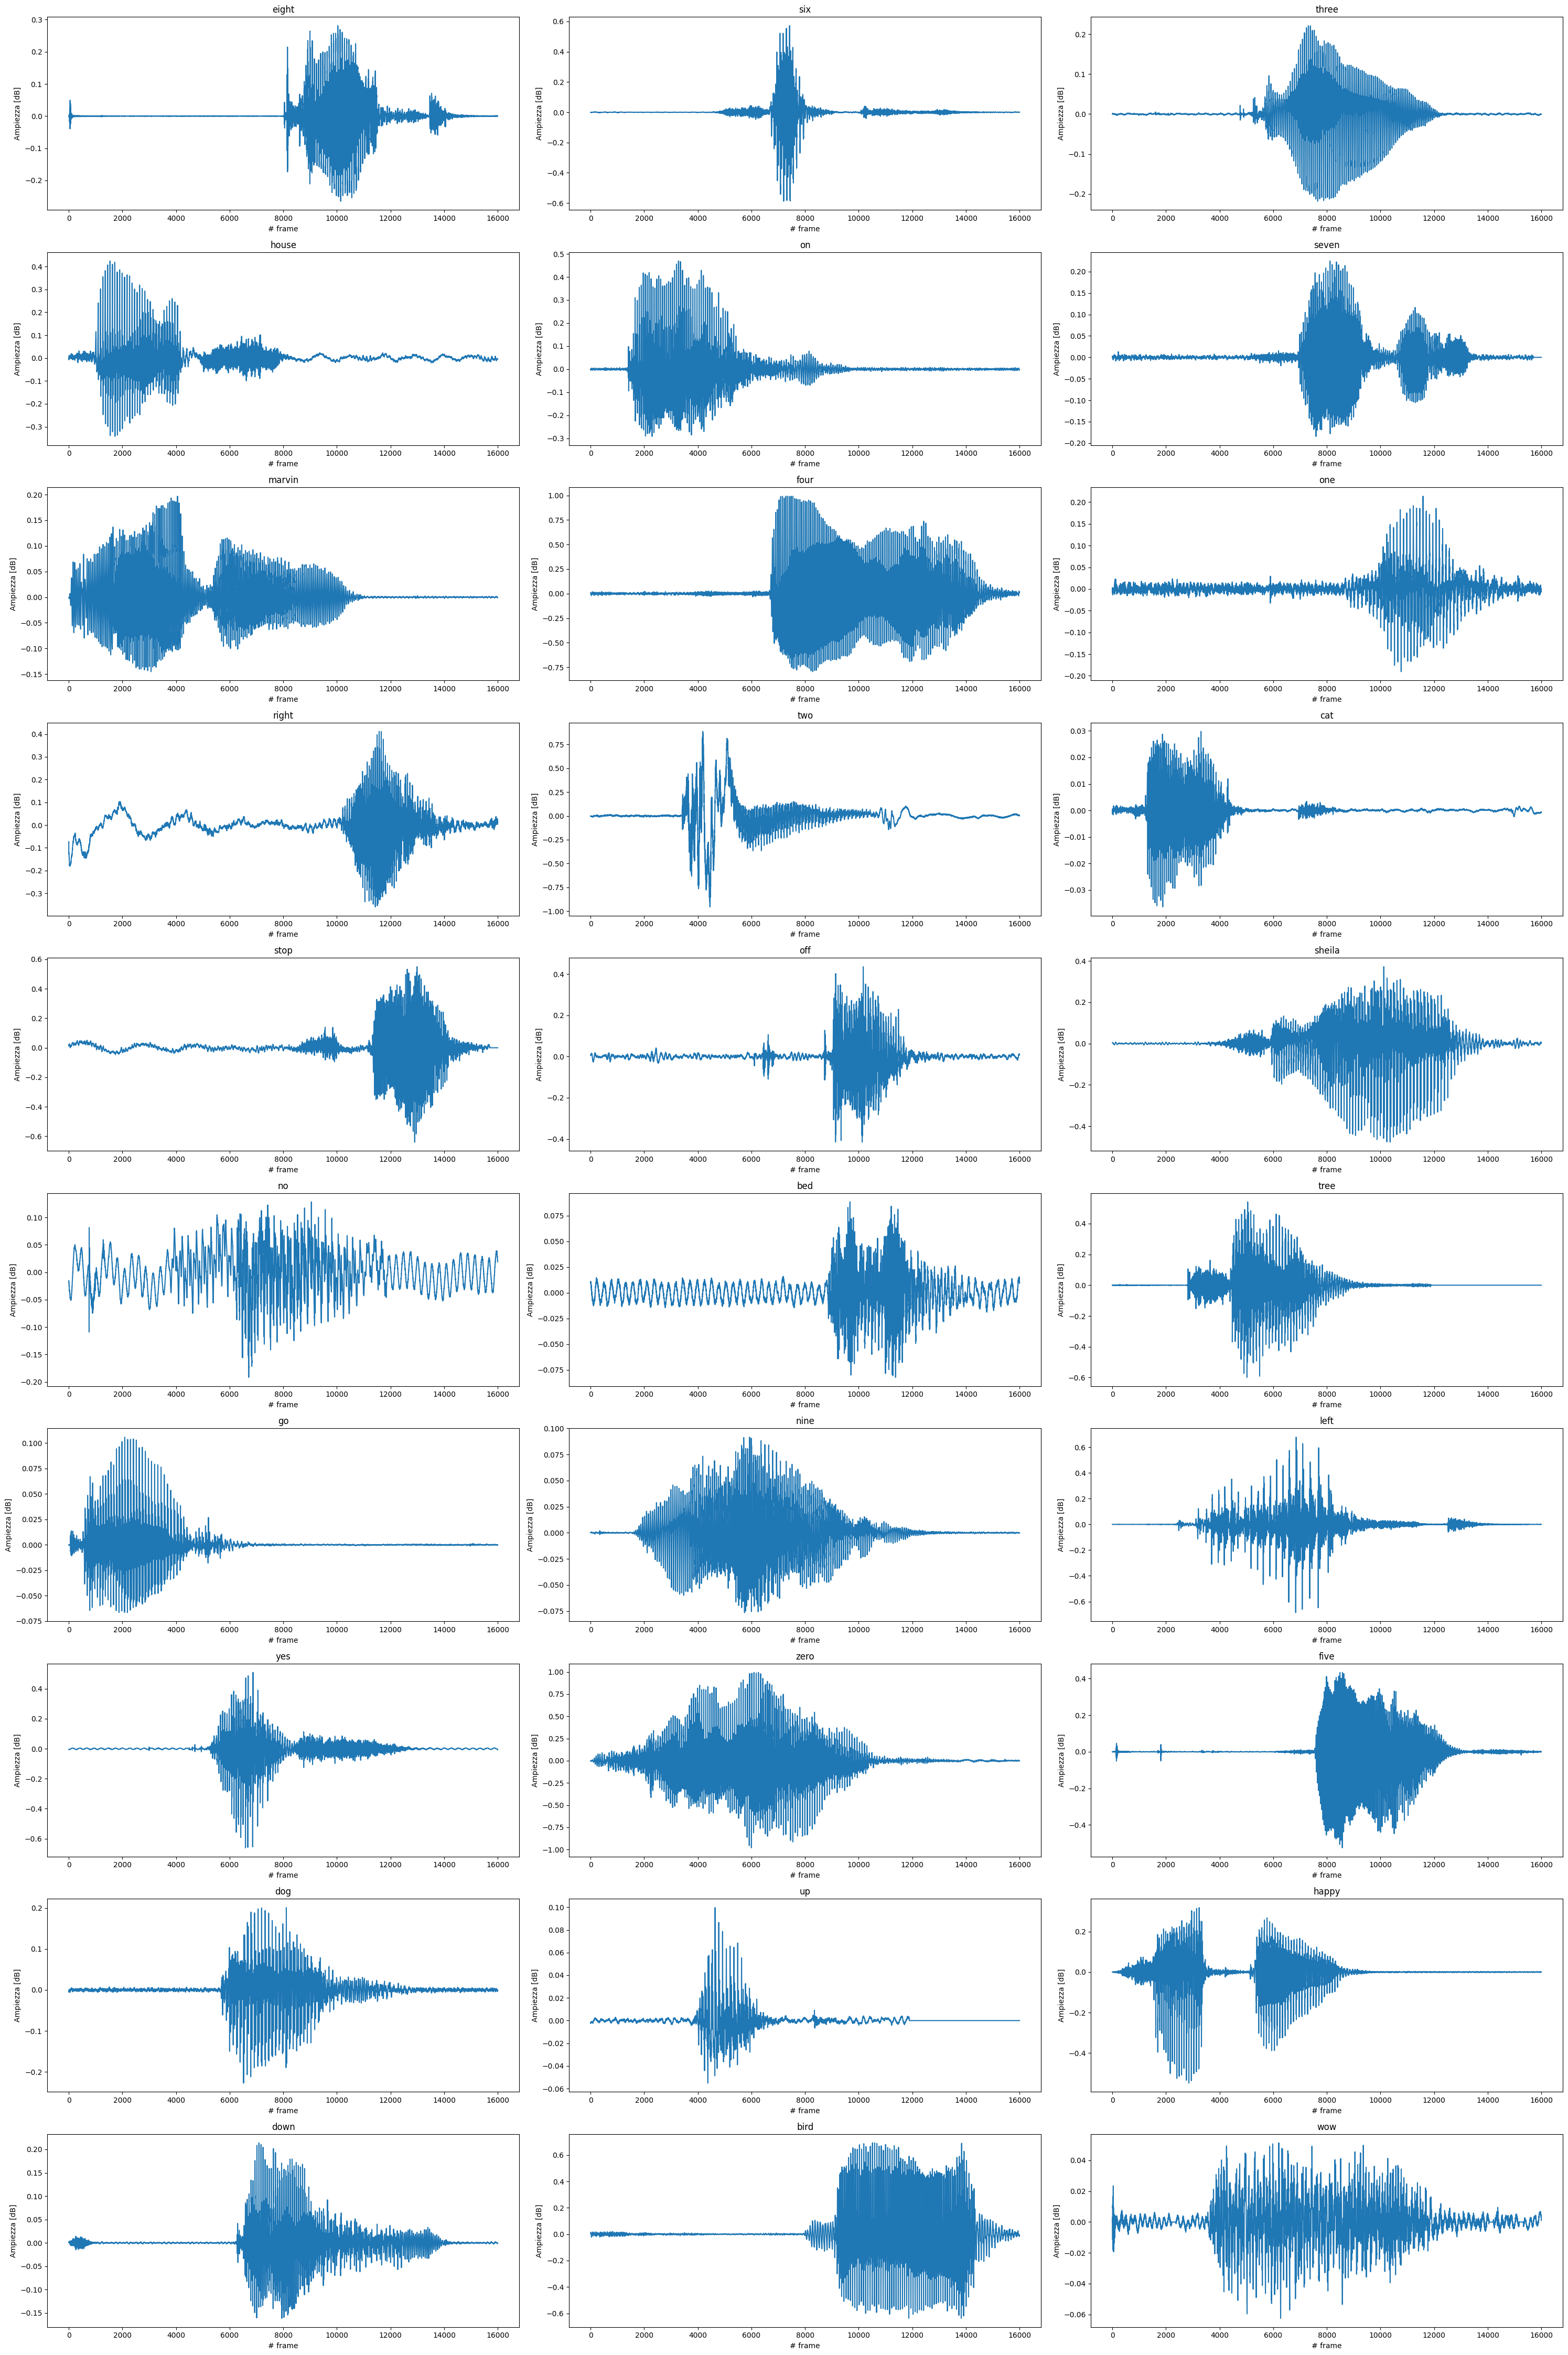

In [9]:
rows = 10
cols = 3

labels = list(audios.keys()) # mi salvo la lista delle label
fig, axes = plt.subplots(rows, cols, figsize=(30, 45))

# inserisco in ciascun subplot un audio
for index, audio in enumerate(audios.values()): 
    row = index // cols
    col = index % cols

    ax = axes[row][col]
    ax.set_ylabel('Ampiezza [dB]')
    ax.set_xlabel('# frame') 
    ax.set_title(labels[index])
    ax.plot(audio)

plt.tight_layout()
plt.show()

Riusciamo a notare, anche a occhio nudo, una notevole differenza di forma per ogni classe.